## Feature Engineering
Documentation: https://support.google.com/analytics/answer/3437719?hl=en

Note: the field 'unique_visit_id' should be unique but is not (around 1800 repeated unique_visit_id's):

trainCSV['unique_visit_id'] = trainCSV.fullVisitorId +'_'+ trainCSV.visitId.apply(str)

In [1]:
import datetime as dt
import numpy as np
from data_wrangling import *
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 150)

In [2]:
%%time
trainCSV = pd.read_csv('train_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False).drop(columns=['trafficSource_campaignCode'])
trainCSV = fill_empty_values(trainCSV)

CPU times: user 45.1 s, sys: 3.72 s, total: 48.8 s
Wall time: 48.5 s


In [46]:
cool_columns = ['fullVisitorId', 'date', 'geoNetwork_city', 'geoNetwork_country', 'device_browser','visits', 'paying_visits', 'totals_transactionRevenue']
trainCSV = trainCSV[cool_columns]

start_train_visits = dt.datetime(2016, 7,29) 
end_train_visits = dt.datetime(2016, 7,29) + timedelta(days=279)
start_validation_visits = dt.datetime(2018, 5,1) - timedelta(days=279)
end_validation_visits = dt.datetime(2018, 5,1)

train_visits = trainCSV[(trainCSV.date >= start_train_visits) & (trainCSV.date<end_train_visits)]
validation_visits = trainCSV[(trainCSV.date >= start_validation_visits) & (trainCSV.date<end_validation_visits)]

In [47]:
trainCSV.date.min()

Timestamp('2016-08-01 07:00:12')

In [48]:
train_visits.date.min()

Timestamp('2016-08-01 07:00:12')

In [49]:
validation_visits.date.min()

Timestamp('2017-07-26 00:00:02')

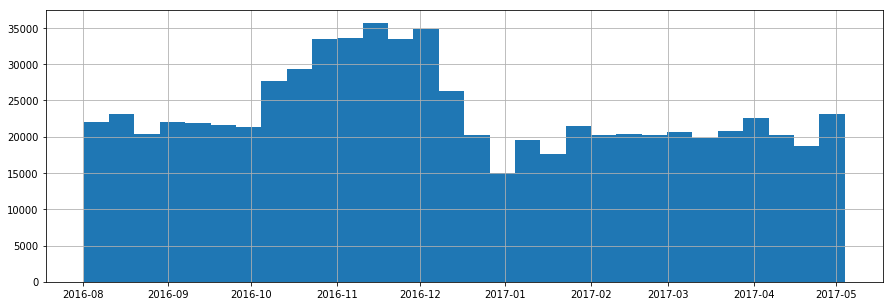

In [50]:
train_visits.date.hist(bins=30, figsize=(15, 5))

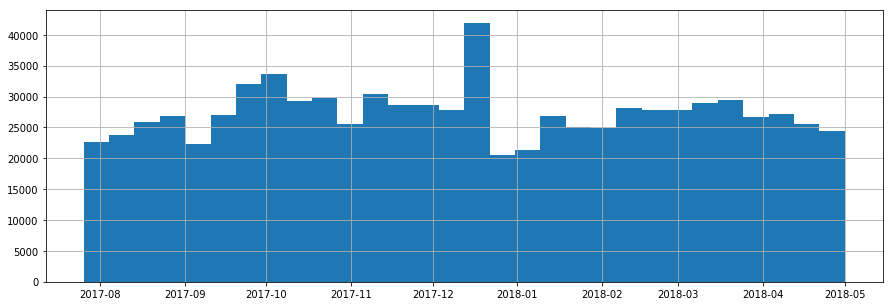

In [51]:
validation_visits.date.hist(bins=30, figsize=(15, 5))

In [52]:
%%time
train = get_training_data_from_visits(train_visits)
validation = get_training_data_from_visits(validation_visits)

2016-08-01 07:00:12
len(all_training_periods) 1
2017-07-26 00:00:02
len(all_training_periods) 1
CPU times: user 14.3 s, sys: 709 ms, total: 15 s
Wall time: 15.1 s


In [58]:
train.target.describe()

count    377131.000000
mean          0.007293
std           0.368107
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.653951
Name: target, dtype: float64

In [63]:
validation.target.describe()

count    387126.000000
mean          0.006187
std           0.333108
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          21.880791
Name: target, dtype: float64

In [64]:
(train.target>0).sum()

149

In [65]:
(validation.target>0).sum()

134

In [66]:
%%time
train_e = label_encode_object_dtypes(encoder_trainer = train, df_to_encode = train)
validation_e = label_encode_object_dtypes(encoder_trainer = train, df_to_encode = validation)

CPU times: user 42.4 s, sys: 1.17 s, total: 43.5 s
Wall time: 44.7 s


In [67]:
train_e.to_csv("train_cool_columns.csv", index=False)
validation_e.to_csv("validation_cool_columns.csv", index=False)